In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_ld= pd.read_csv('country_vaccinations.csv')

data_ld.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            34.0   
2                                  NaN                            34.0   
3                                  NaN                            34.0   
4                                  NaN                            34.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name            source_website  
0  World Health Organization  https://covid19.who.int/  
1  World Health Organization  https://covid19.who.int/  
2  World Health Organization  https://covid19.who.int/  
3  World Health Organization  https://covid19.who.int/  
4  World Health Organization  https://covid19.who.int/

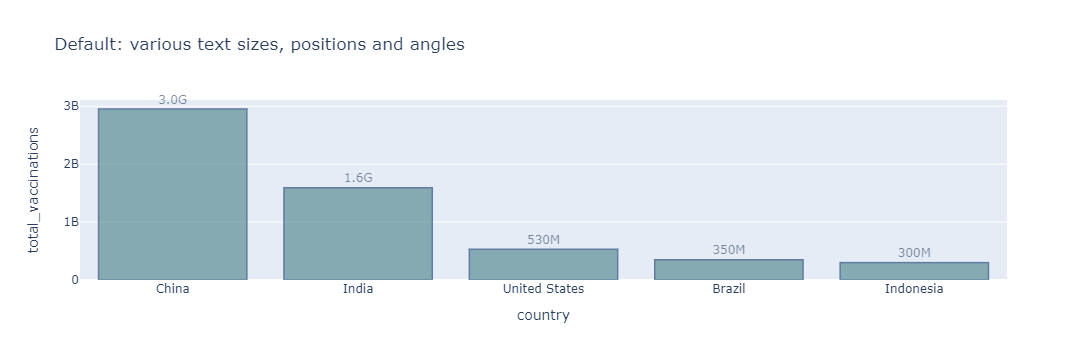

In [55]:
top5_countries_total_vaccination = data_ld.groupby('country').max()
top5_countries_total_vaccination = top5_countries_total_vaccination.sort_values('total_vaccinations', ascending=False)
top5_countries_total_vaccination = top5_countries_total_vaccination[:5]
top5_countries_total_vaccination=top5_countries_total_vaccination.reset_index()
import plotly.express as px
fig = px.bar(top5_countries_total_vaccination, y='total_vaccinations', x='country', text_auto='.2s',
            title="Default: various text sizes, positions and angles")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_traces(marker_color='#467F84', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

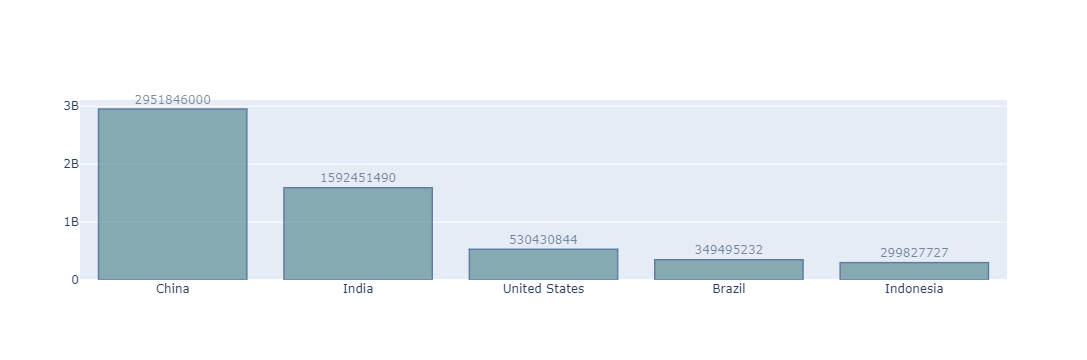

In [58]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(
            x=top5_countries_total_vaccination['country'], y=top5_countries_total_vaccination['total_vaccinations'],
            text=top5_countries_total_vaccination['total_vaccinations'],
            textposition='auto',
        )])
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_traces(marker_color='#467F84', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.show()

In [59]:
top5_countries_total_vaccination

country iso_code        date  total_vaccinations  people_vaccinated  \
0          China      CHN  2022-01-19        2.951846e+09       1.263691e+09   
1          India      IND  2022-01-19        1.592451e+09       9.190596e+08   
2  United States      USA  2022-01-19        5.304308e+08       2.497029e+08   
3         Brazil      BRA  2022-01-19        3.494952e+08       1.675473e+08   
4      Indonesia      IDN  2022-01-19        2.998277e+08       1.782611e+08   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0             1.220584e+09              24741000.0          22424286.0   
1             6.675520e+08              18627269.0          10037995.0   
2             2.087516e+08               4541946.0           3507229.0   
3             1.477380e+08               3976605.0           1941268.0   
4             1.210758e+08               4112589.0           1897011.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                          204.39                          87.50   
1                          114.28                          65.96   
2                          159.76                          75.21   
3                          163.32                          78.30   
4                          108.49                          64.50   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                84.52                         15527.0   
1                                47.91                          7204.0   
2                                62.88                         10564.0   
3                                69.04                          9072.0   
4                                43.81                          6864.0   

                                            vaccines  \
0  CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...   
1             Covaxin, Oxford/AstraZeneca, Sputnik V   
2          Johnson&Johnson, Moderna, Pfizer/BioNTech   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Moderna, Novavax, Oxford/Astr...   

                                       source_name  \
0                       National Health Commission   
1                              Government of India   
2       Centers for Disease Control and Prevention   
3  State governments via coronavirusbra1.github.io   
4                          Government of Indonesia   

                                      source_website  
0  http://www.nhc.gov.cn/jkj/s7915/202201/87b647f...  
1                    https://dashboard.cowin.gov.in/  
2  https://data.cdc.gov/Vaccinations/COVID-19-Vac...  
3                  https://coronavirusbra1.github.io  
4       https://data.covid19.go.id/public/index.html

In [63]:
comb_vaccine = data_ld.groupby('vaccines')['total_vaccinations'].sum().sort_values(ascending=False)
comb_vaccine = comb_vaccine/1000000
comb_vaccine = comb_vaccine[:5]
comb_vaccine

vaccines
CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001     495225.368700
Covaxin, Oxford/AstraZeneca, Sputnik V                           203068.975138
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech    127874.832982
Johnson&Johnson, Moderna, Pfizer/BioNTech                        119794.467603
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                      95833.963415
Name: total_vaccinations, dtype: float64

In [68]:
countries = data_ld.groupby('country')['total_vaccinations'].max().sort_values(ascending= False)[:5].index

top_countries = pd.DataFrame(columns= data_ld.columns)
for country in countries:
    top_countries = top_countries.append(data_ld.loc[data_ld['country'] == country])
top_countries

country iso_code        date  total_vaccinations  people_vaccinated  \
13074      China      CHN  2020-12-15           1500000.0                NaN   
13075      China      CHN  2020-12-16                 NaN                NaN   
13076      China      CHN  2020-12-17                 NaN                NaN   
13077      China      CHN  2020-12-18                 NaN                NaN   
13078      China      CHN  2020-12-19                 NaN                NaN   
...          ...      ...         ...                 ...                ...   
30148  Indonesia      IDN  2022-01-15         295070052.0        175645471.0   
30149  Indonesia      IDN  2022-01-16         296048521.0        176301989.0   
30150  Indonesia      IDN  2022-01-17         296622793.0        176629941.0   
30151  Indonesia      IDN  2022-01-18                 NaN                NaN   
30152  Indonesia      IDN  2022-01-19         299827727.0        178261136.0   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
13074                      NaN                     NaN                 NaN   
13075                      NaN                     NaN            187500.0   
13076                      NaN                     NaN            187500.0   
13077                      NaN                     NaN            187500.0   
13078                      NaN                     NaN            187500.0   
...                        ...                     ...                 ...   
30148                      NaN               1826453.0           1274274.0   
30149                      NaN                978469.0           1297849.0   
30150                      NaN                574272.0           1298167.0   
30151              121075830.0                     NaN           1405057.0   
30152                      NaN                     NaN           1389237.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
13074                            0.10                            NaN   
13075                             NaN                            NaN   
13076                             NaN                            NaN   
13077                             NaN                            NaN   
13078                             NaN                            NaN   
...                               ...                            ...   
30148                          106.77                          63.56   
30149                          107.12                          63.79   
30150                          107.33                          63.91   
30151                             NaN                            NaN   
30152                          108.49                          64.50   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
13074                                  NaN                             NaN   
13075                                  NaN                           130.0   
13076                                  NaN                           130.0   
13077                                  NaN                           130.0   
13078                                  NaN                           130.0   
...                                    ...                             ...   
30148                                  NaN                          4611.0   
30149                                  NaN                          4696.0   
30150                                  NaN                          4697.0   
30151                                43.81                          5084.0   
30152                                  NaN                          5027.0   

                                                vaccines  \
13074  CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...   
13075  CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...   
13076  CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...   
13077  CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...   
13078  Ca

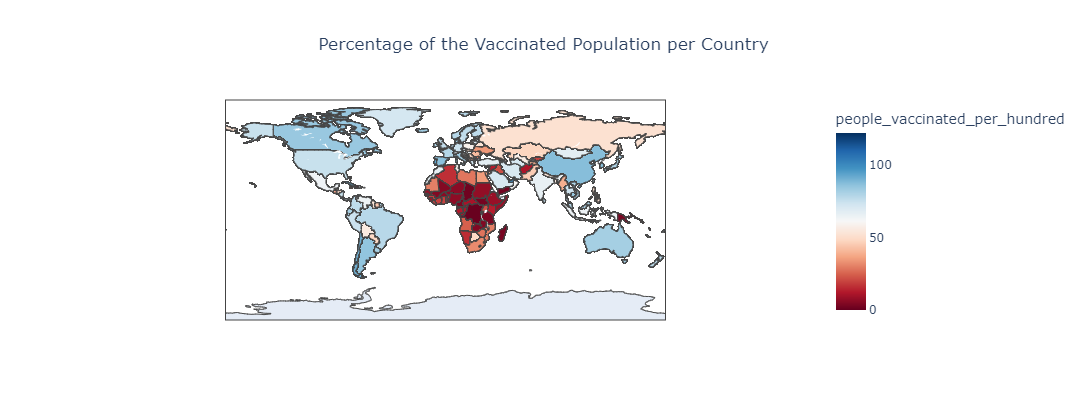

In [164]:

title = 'Percentage of the Vaccinated Population per Country'
fig = px.choropleth(data_ld, locations="country", 
                    locationmode='country names',
                    color="people_vaccinated_per_hundred", 
                    hover_name="country", 
                    title='Percentage of the Vaccinated Population',
                    color_continuous_scale= px.colors.sequential.RdBu,
                    width= 800,
                    height= 400
                   )

fig.update_layout(title=title, 
                  title_x= 0.5)
fig.show()

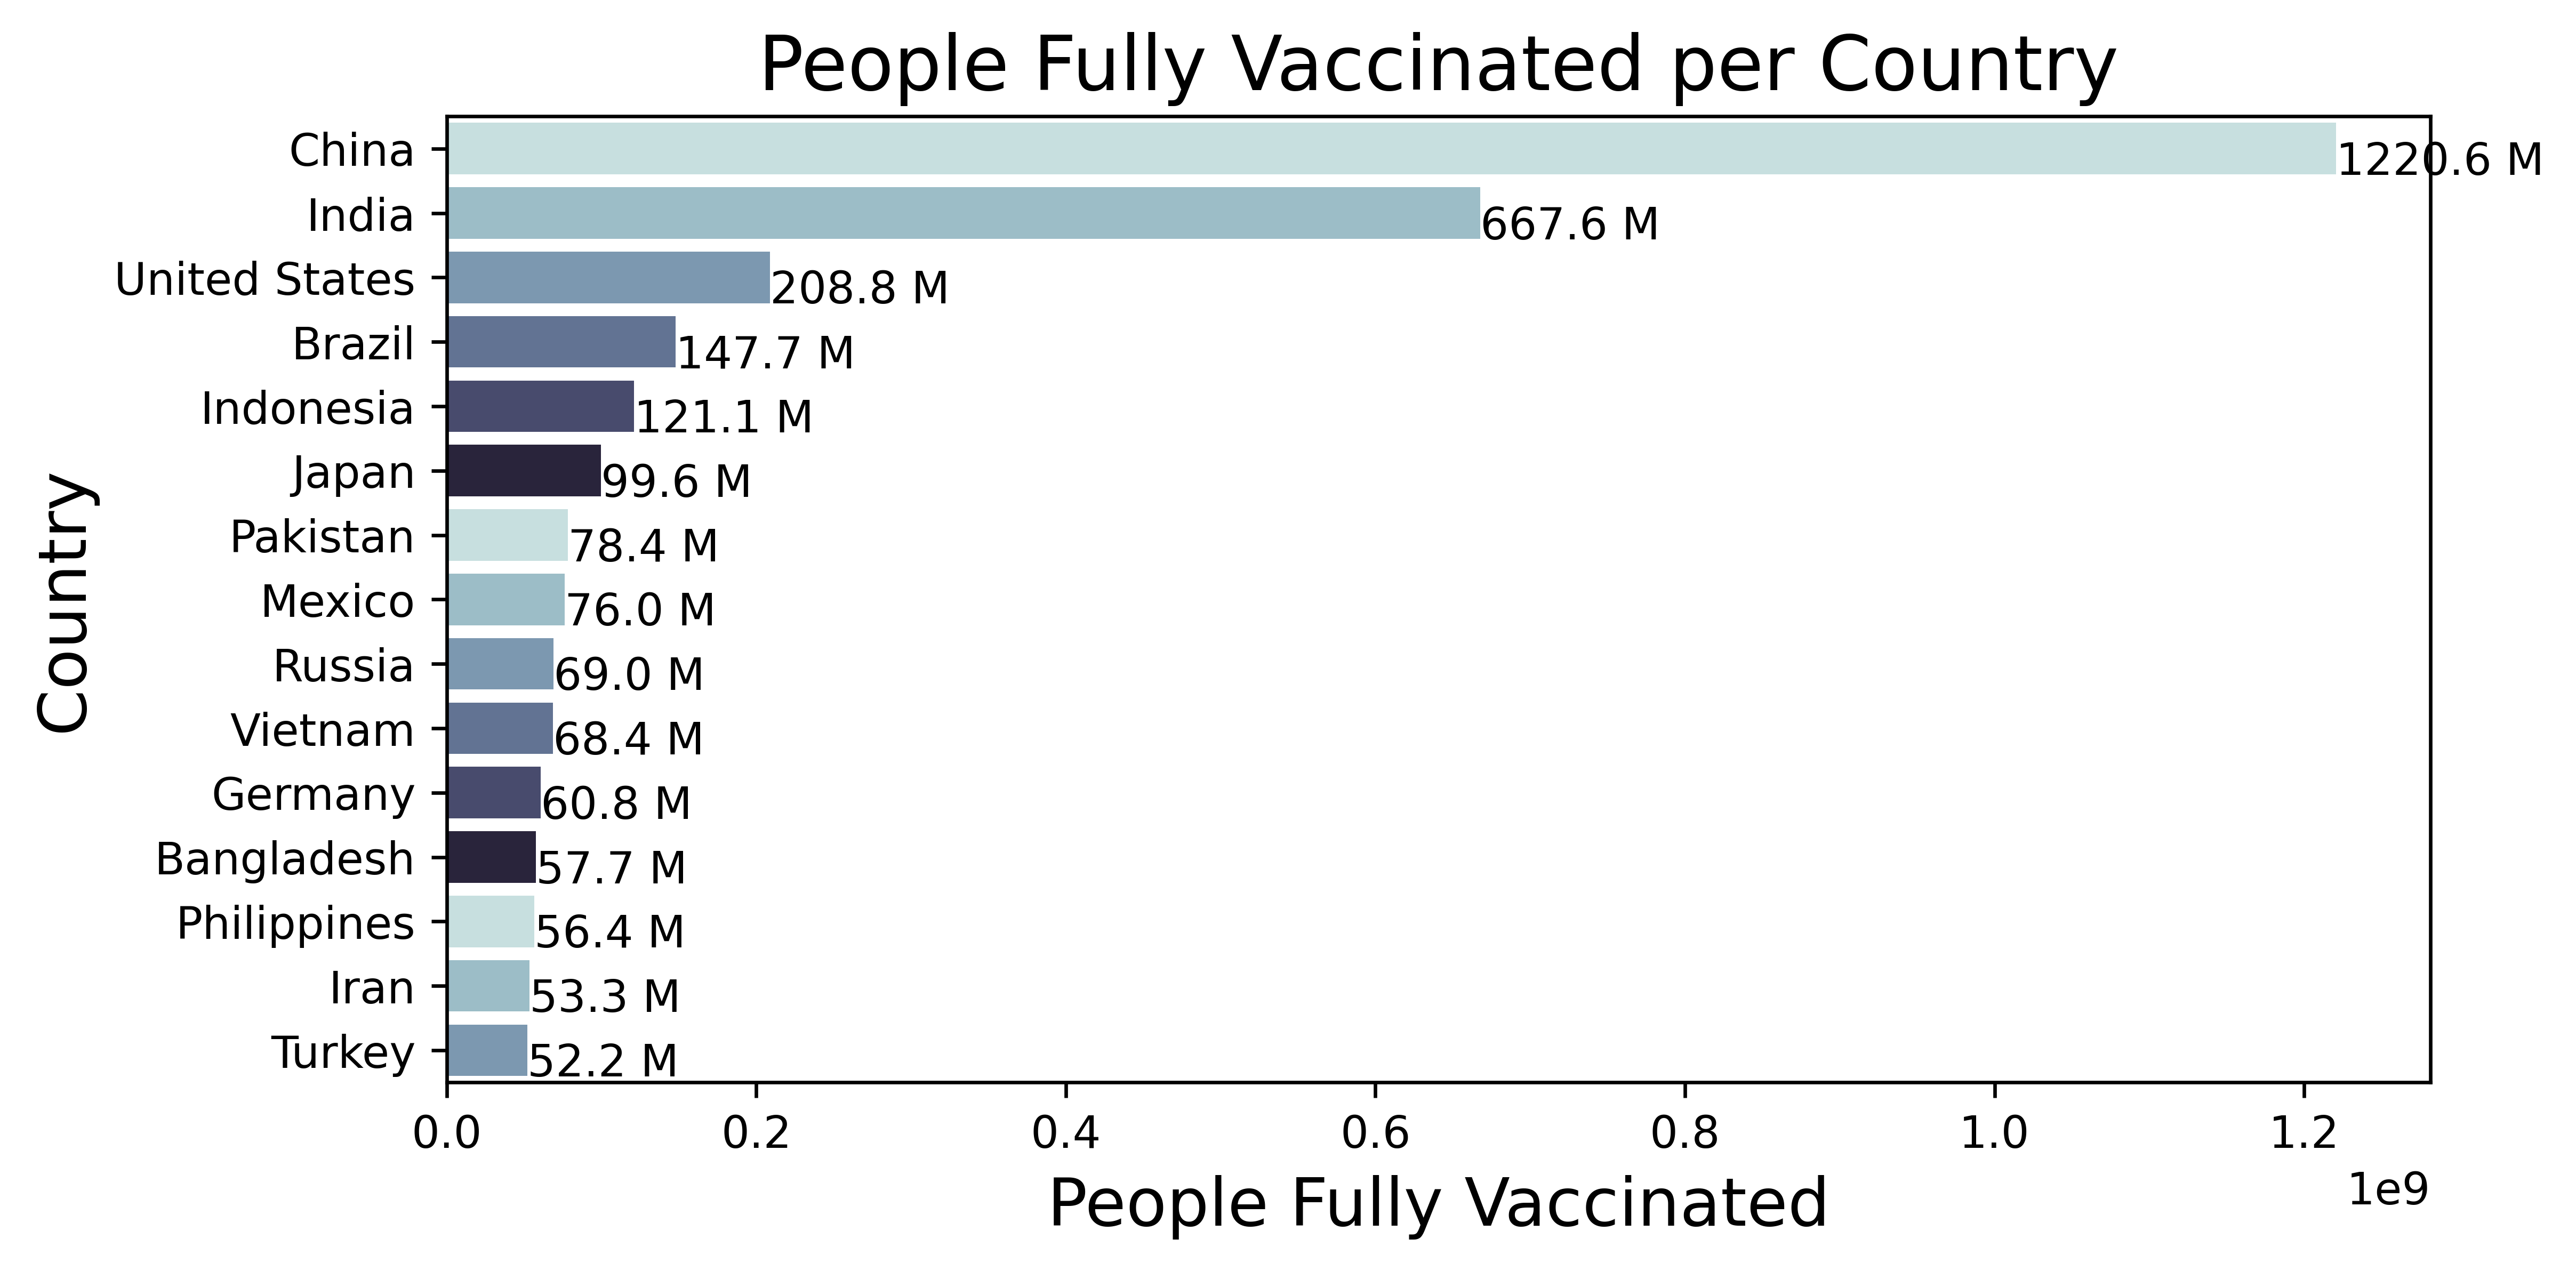

In [106]:
fully=data_ld.groupby('country').max()

fully=fully.reset_index()
plt.figure(figsize= (8, 4))


ax = sns.barplot(data= fully, y= 'country', x= 'people_fully_vaccinated',
                order= fully.sort_values('people_fully_vaccinated', ascending= False)['country'][:15],
                palette= sns.color_palette("ch:start=.2,rot=-.3"))
plt.title('People Fully Vaccinated per Country', size= 17)
plt.xlabel('People Fully Vaccinated', size= 15)
plt.ylabel('Country', size= 15)

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} M'.format(int(width)/1000000))


In [109]:
order= fully.sort_values('people_fully_vaccinated', ascending= False)[:15]
order

country iso_code        date  total_vaccinations  \
41           China      CHN  2022-01-19        2.951846e+09   
91           India      IND  2022-01-19        1.592451e+09   
212  United States      USA  2022-01-19        5.304308e+08   
27          Brazil      BRA  2022-01-19        3.494952e+08   
92       Indonesia      IDN  2022-01-19        2.998277e+08   
100          Japan      JPN  2022-01-19        2.026587e+08   
151       Pakistan      PAK  2022-01-19        1.699258e+08   
127         Mexico      MEX  2022-01-19        1.571459e+08   
163         Russia      RUS  2022-01-18        1.507919e+08   
217        Vietnam      VNM  2022-01-16        1.689601e+08   
75         Germany      DEU  2022-01-19        1.604221e+08   
15      Bangladesh      BGD  2022-01-19        1.498713e+08   
157    Philippines      PHL  2022-01-19        1.214934e+08   
93            Iran      IRN  2022-01-19        1.272168e+08   
204         Turkey      TUR  2022-01-19        1.400876e+08   

     people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
41        1.263691e+09             1.220584e+09              24741000.0   
91        9.190596e+08             6.675520e+08              18627269.0   
212       2.497029e+08             2.087516e+08               4541946.0   
27        1.675473e+08             1.477380e+08               3976605.0   
92        1.782611e+08             1.210758e+08               4112589.0   
100       1.012622e+08             9.961590e+07               6586453.0   
151       1.026890e+08             7.838994e+07               1703092.0   
127       8.300295e+07             7.600659e+07               7246123.0   
163       7.511107e+07             6.895856e+07               2389472.0   
217       7.861835e+07             6.843581e+07               2091069.0   
75        6.259277e+07             6.075432e+07               1641382.0   
15        9.132254e+07             5.767527e+07               6758992.0   
157       5.611030e+07             5.644441e+07               2648872.0   
93        6.040495e+07             5.333491e+07               1706088.0   
204       5.730023e+07             5.220176e+07               1796891.0   

     daily_vaccinations  total_vaccinations_per_hundred  \
41           22424286.0                          204.39   
91           10037995.0                          114.28   
212           3507229.0                          159.76   
27            1941268.0                          163.32   
92            1897011.0                          108.49   
100           1997542.0                          160.78   
151           1394785.0                           75.46   
127           1648223.0                          120.64   
163           1020075.0                          103.34   
217           1675471.0                          172.11   
75            1124072.0                          191.21   
15            1994776.0                           90.12   
157           1629125.0                          109.41   
93            1225502.0                          149.62   
204           1264431.0                          164.73   

     people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
41                           87.50                                84.52   
91                           65.96                                47.91   
212                          75.21                                62.88   
27                           78.30                                69.04   
92                           64.50                                43.81   
100                          80.33                                79.03   
151                          45.60                                34.81   
127                          63.72                                58.35   
163                          51.48                                47.26   
217                          80.08                                69.71   
75                           74

In [110]:
countries = data_ld.groupby('country')['total_vaccinations'].max().sort_values(ascending= False)[:5].index

top_countries = pd.DataFrame(columns= df.columns)
for country in countries:
    top_countries = top_countries.append(data_ld.loc[df['country'] == country])

In [160]:
from datetime import datetime
data_ld['date'] = pd.to_datetime(data_ld['date'])
countries = data_ld.groupby('country')['total_vaccinations'].max().sort_values(ascending= False)[:5].index

top_countries = pd.DataFrame(columns= data_ld.columns)
for country in countries:
    top_countries = top_countries.append(data_ld.loc[data_ld['country'] == country])




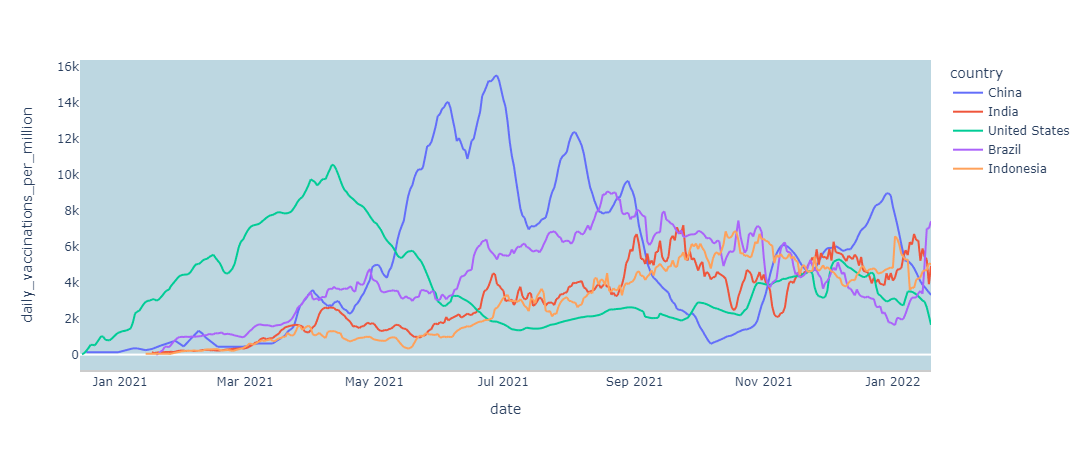

In [162]:
fig = px.line(top_countries, x="date", y='daily_vaccinations_per_million', color='country')
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
    ),
    yaxis=dict(
        showgrid=False,
        
    ),
    autosize=False,
    
    plot_bgcolor='#BDD7E1'
)


fig.show()